In [1]:
from src.dataloader import MyDataset
from src.params import get_args

args = get_args()
dataset = MyDataset(args)

In [9]:
dataset.__getitem__(0)

(('gjjcore5', Timestamp('2021-02-26 03:33:02.259792')), 0)

In [10]:
import torch

In [14]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])

In [16]:
for i in train_set:
    print(i)

(('gjjha3', Timestamp('2021-03-14 14:06:02.511464')), 7)
(('gjjha1', Timestamp('2021-03-11 00:28:01.699586')), 4)
(('gjjcore7', Timestamp('2021-03-11 12:04:01.477523')), 0)
(('gjjbps1', Timestamp('2021-03-11 17:35:01.500463')), 1)
(('gjjcore2', Timestamp('2021-03-06 23:38:01.771246')), 0)
(('gjjha1', Timestamp('2021-02-26 09:53:02.546099')), 0)
(('gjjuaap1', Timestamp('2021-03-25 08:33:01.469059')), 0)
(('gjjcore6', Timestamp('2021-03-21 16:06:01.463478')), 0)
(('gjjcore2', Timestamp('2021-03-17 07:26:01.505270')), 1)
(('gjjap1', Timestamp('2021-02-26 13:22:03.578143')), 3)
(('gjjcore3', Timestamp('2021-03-17 08:15:01.504729')), 0)
(('gjjha2', Timestamp('2021-03-10 17:52:01.493955')), 1)
(('gjjcore9', Timestamp('2021-03-19 20:40:01.585612')), 5)
(('gjjcore3', Timestamp('2021-03-24 17:57:01.475023')), 0)
(('gjjcore1', Timestamp('2021-03-16 05:02:01.473682')), 0)
(('gjjcore6', Timestamp('2021-03-19 18:52:02.493112')), 7)
(('gjjcore7', Timestamp('2021-03-22 18:58:01.468060')), 1)
(('gjjco

In [212]:
import src.dataloader as dataloader
import importlib
importlib.reload(dataloader)

<module 'src.dataloader' from '/home/junetheriver/code/aiops/src/dataloader.py'>

In [196]:
dt  = dataloader.load_dt(args)

In [51]:
x, y = dataset[0]

In [52]:
cmdb_id, timestamp = x

In [53]:
cmdb_id

'gjjcore5'

In [54]:
timestamp

Timestamp('2021-02-26 03:33:02.259792')

In [161]:
import src.model as model
import pandas as pd
import numpy as np

In [197]:
cmdb_dt = model.get_cmdb_dt(dt, cmdb_id)

In [198]:
list(cmdb_dt.values())[11].head()

,value
timestamp,
2021-02-25 16:00:00,0.01
2021-02-25 16:01:00,0.01
2021-02-25 16:02:00,0.01
2021-02-25 16:03:00,0.01
2021-02-25 16:04:00,0.01


In [199]:
datetime = timestamp.round("min")
datetime

Timestamp('2021-02-26 03:33:00')

In [200]:
kpi = []
for kpi_name, data in cmdb_dt.items():
    if datetime in data.index:
        kpi.append(data.loc[datetime].value)
    else:
        kpi.append(np.NaN)
np.array(kpi)

array([1.08047862e+08, 0.00000000e+00, 8.88843000e+04, 1.20000000e+01,
       0.00000000e+00, 5.00000000e-02, 1.00000000e+00, 0.00000000e+00,
       5.45958840e+07, 0.00000000e+00, 2.26700000e+01, 4.00000000e-02,
       3.20000000e+01, 0.00000000e+00, 1.10940000e+04, 3.39700000e+01,
       5.00000000e-01,            nan, 0.00000000e+00, 2.13610000e+04,
       1.28000000e+00, 3.90000000e-01, 1.55000000e+02, 0.00000000e+00,
       9.95879800e+07, 2.00000000e-02, 3.94000000e+00, 0.00000000e+00,
       2.13093025e+06, 3.32700000e+01, 0.00000000e+00, 1.36555000e+03,
       1.00000000e+00, 4.32000000e+03, 5.40881130e+05, 3.00000000e+00,
       3.48209280e+05, 4.82000000e+00, 8.65350000e+04, 6.80000000e+01,
       5.00000000e-01, 3.20000000e-01, 3.13200000e+04, 0.00000000e+00,
       5.89000000e+02, 9.00000000e-02, 1.03000000e+00, 6.92000000e+02,
       8.75000000e+02, 1.98810000e+04, 0.00000000e+00, 4.00000000e-02,
       1.28130000e+03, 2.04200000e+03, 2.62160000e+03, 1.03000000e+00,
      

In [172]:
kpi = np.array([data.loc[datetime].value if (datetime in data.index)
                else np.NaN
                for data in cmdb_dt.values()])
kpi

array([1.08047862e+08, 0.00000000e+00, 8.88843000e+04, 1.20000000e+01,
       0.00000000e+00, 5.00000000e-02, 1.00000000e+00, 0.00000000e+00,
       5.45958840e+07, 0.00000000e+00, 2.26700000e+01, 4.00000000e-02,
       3.20000000e+01, 0.00000000e+00, 1.10940000e+04, 3.39700000e+01,
       5.00000000e-01,            nan, 0.00000000e+00, 2.13610000e+04,
       1.28000000e+00, 3.90000000e-01, 1.55000000e+02, 0.00000000e+00,
       9.95879800e+07, 2.00000000e-02, 3.94000000e+00, 0.00000000e+00,
       2.13093025e+06, 3.32700000e+01, 0.00000000e+00, 1.36555000e+03,
       1.00000000e+00, 4.32000000e+03, 5.40881130e+05, 3.00000000e+00,
       3.48209280e+05, 4.82000000e+00, 8.65350000e+04, 6.80000000e+01,
       5.00000000e-01, 3.20000000e-01, 3.13200000e+04, 0.00000000e+00,
       5.89000000e+02, 9.00000000e-02, 1.03000000e+00, 6.92000000e+02,
       8.75000000e+02, 1.98810000e+04, 0.00000000e+00, 4.00000000e-02,
       1.28130000e+03, 2.04200000e+03, 2.62160000e+03, 1.03000000e+00,
      

In [173]:
import src.model as model
importlib.reload(model)

<module 'src.model' from '/home/junetheriver/code/aiops/src/model.py'>

In [201]:
model.get_kpi_at_time(dt, datetime)

array([0.00000000e+00, 2.00000000e-02, 2.13025025e+06, ...,
       0.00000000e+00, 8.05300000e+03, 1.00000000e-02])

In [180]:
list(dt.values())[2142].loc[datetime].value
list(dt.keys())[2142]

('gjjcore8', 'weblogic.can_connect')

In [157]:
datetime

Timestamp('2021-02-26 03:33:00')

In [202]:
test_df = list(cmdb_dt.values())[0]

In [211]:
test_df.describe().loc["50%"] == test_df.median()

value    True
dtype: bool

In [78]:
len(test_df.resample("Min").mean())

38880

In [215]:
test2 = test_df.resample("Min").mean()

In [81]:
import numpy as np

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
test2.freq = 1

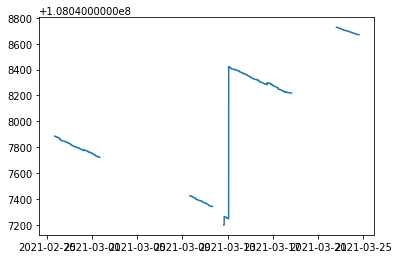

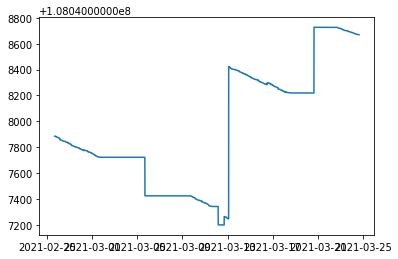

In [216]:
import matplotlib.pyplot as plt
plt.plot(test2)
plt.show()
plt.plot(test2.interpolate(method='nearest', limit_direction="forward"))
# plt.legend(["original", "inter"])
plt.show()

In [155]:
result = seasonal_decompose(test2.interpolate(method='slinear', limit_direction="forward"), period=100000)
result.plot()

ValueError: x must have 2 complete cycles requires 200000 observations. x only has 38880 observation(s)

<AxesSubplot:xlabel='timestamp'>

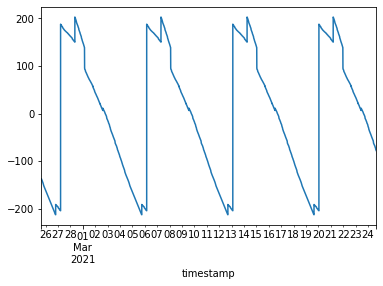

In [153]:
result.seasonal.plot()

In [213]:
a = [range(1,3), range(5,10), range(100,1000)]

In [214]:
b = 4
b in a

False

In [223]:
for x in test2.value:
    if np.isnan(x):
        print(x)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [232]:
import src.model as model
importlib.reload(model)
interval_array = model.get_time_range(test2)

2021-02-25 16:00:00 2021-02-25 16:00:00
2021-03-09 16:00:00 2021-03-09 16:00:00
2021-03-12 16:00:00 2021-03-12 16:00:00


In [233]:
print(interval_array)

<IntervalArray>
[(2021-02-25 16:00:00, 2021-03-01 15:59:00], (2021-03-09 16:00:00, 2021-03-11 15:59:00], (2021-03-12 16:00:00, 2021-03-18 15:59:00], (2021-03-22 16:00:00, 2021-03-24 15:59:00]]
Length: 4, dtype: interval[datetime64[ns], right]


In [238]:
import src.main as main
import src.params as params
importlib.reload(params)
args = params.get_args("../config/basic.yaml")
data = main.get_cmdb(args)

Loading preprocessed data from /home/junetheriver/code/aiops/workdir/system_a/data_pre.pkl


In [8]:
import src.main as main
import src.params as params
import src.model as model
import src.stats as stats
import importlib
importlib.reload(model)
importlib.reload(params)
importlib.reload(main)
importlib.reload(stats)
args = params.get_args("../config/basic.yaml")
data = main.get_cmdb(args)
args = params.get_args("../config/basic.yaml")
smodel = model.Statistic(args, data)

Loading preprocessed data from /home/junetheriver/code/aiops/workdir/system_a/data_pre.pkl


In [254]:
args.workdir

'/home/junetheriver/code/aiops/workdir/system_a'

In [246]:
for p in list(smodel.parameters()):
    print(p.shape)

torch.Size([8, 2152])
torch.Size([8])


In [250]:
smodel.time_range

{('gjjcore8',
  'system.net.tcp.retrans_segs'): <IntervalArray>
 [(2021-02-25 16:00:00, 2021-03-01 16:09:00], (2021-03-09 16:00:00, 2021-03-11 16:09:00], (2021-03-12 16:00:00, 2021-03-18 16:09:00], (2021-03-22 16:00:00, 2021-03-24 15:59:00]]
 Length: 4, dtype: interval[datetime64[ns], right],
 ('gjjcore9',
  'system.tcp.retrans_pct'): <IntervalArray>
 [(2021-02-25 16:00:00, 2021-03-01 16:09:00], (2021-03-09 16:00:00, 2021-03-11 16:09:00], (2021-03-12 16:00:00, 2021-03-18 16:09:00], (2021-03-22 16:00:00, 2021-03-24 15:59:00]]
 Length: 4, dtype: interval[datetime64[ns], right],
 ('gjjha3',
  'system.run_time'): <IntervalArray>
 [(2021-02-25 16:00:00, 2021-03-01 16:09:00], (2021-03-09 16:00:00, 2021-03-11 16:09:00], (2021-03-12 16:00:00, 2021-03-18 16:09:00], (2021-03-22 16:00:00, 2021-03-24 15:59:00]]
 Length: 4, dtype: interval[datetime64[ns], right],
 ('gjjha1',
  'system.io.w_s'): <IntervalArray>
 [(2021-02-25 16:00:00, 2021-03-01 16:09:00], (2021-03-09 16:00:00, 2021-03-11 16:09:00],

In [9]:
a = [False, False, False]
if a:
    print(a)

[False, False, False]
